In [11]:
import hydra
import jax
import jax.numpy as jnp
from loguru import logger
from omegaconf import DictConfig

from jaxarc.parsers.arc_agi import ArcAgiParser
from jaxarc.utils.config import get_config
from jaxarc.utils.visualization import (
    draw_grid_svg,
    log_grid_to_console,
    save_svg_drawing,
    visualize_grid_rich,
    visualize_task_pair_rich,
    visualize_parsed_task_data_rich,
    draw_parsed_task_data_svg
)

In [3]:
cfg = get_config()

parser = ArcAgiParser(
    cfg=cfg.environment,
)

dataset_name = cfg.environment.dataset_name
dataset_year = cfg.environment.dataset_year

logger.info(f"Dataset: {dataset_name} ({dataset_year})")
logger.info(f"Description: {cfg.environment.description}")
logger.info(f"Available tasks: {len(parser.get_available_task_ids())}")

2025-06-14 16:02:41.672 | INFO     | jaxarc.parsers.arc_agi:_load_and_cache_tasks:70 - Loaded 400 tasks from /Users/aadam/workspace/JaxARC/data/raw/arc-prize-2024/arc-agi_training_challenges.json
2025-06-14 16:02:41.677 | INFO     | jaxarc.parsers.arc_agi:_load_and_cache_tasks:84 - Loaded solutions from /Users/aadam/workspace/JaxARC/data/raw/arc-prize-2024/arc-agi_training_solutions.json
2025-06-14 16:02:41.677 | INFO     | jaxarc.parsers.arc_agi:_load_and_cache_tasks:108 - Cached 400 tasks in memory
2025-06-14 16:02:41.680 | INFO     | __main__:<module>:10 - Dataset: ARC-AGI-1 (2024)
2025-06-14 16:02:41.680 | INFO     | __main__:<module>:11 - Description: ARC-AGI-1 dataset (2024) for abstract reasoning tasks
2025-06-14 16:02:41.680 | INFO     | __main__:<module>:12 - Available tasks: 400
2025-06-14 16:02:41.677 | INFO     | jaxarc.parsers.arc_agi:_load_and_cache_tasks:84 - Loaded solutions from /Users/aadam/workspace/JaxARC/data/raw/arc-prize-2024/arc-agi_training_solutions.json
2025-

In [4]:
 # Get a random task
key = jax.random.PRNGKey(42)
try:
    parsed_task = parser.get_random_task(key)
    logger.info(f"Successfully parsed task: {parsed_task.task_id}")
    logger.info(f"Number of training pairs: {parsed_task.num_train_pairs}")
    logger.info(f"Number of test pairs: {parsed_task.num_test_pairs}")
    logger.info(f"Input grids shape: {parsed_task.input_grids_examples.shape}")
    logger.info(f"Output grids shape: {parsed_task.output_grids_examples.shape}")
    logger.info(f"Test input grids shape: {parsed_task.test_input_grids.shape}")
except Exception as e:
    logger.error(f"Error parsing task: {e}")
    raise

2025-06-14 16:04:55.767 | DEBUG    | jaxarc.parsers.utils:log_parsing_stats:197 - Task 1a07d186: 3 train pairs, 1 test pairs, max grid size: 19x26
2025-06-14 16:04:55.768 | INFO     | __main__:<module>:5 - Successfully parsed task: 1a07d186
2025-06-14 16:04:55.768 | INFO     | __main__:<module>:6 - Number of training pairs: 3
2025-06-14 16:04:55.769 | INFO     | __main__:<module>:7 - Number of test pairs: 1
2025-06-14 16:04:55.769 | INFO     | __main__:<module>:8 - Input grids shape: (10, 30, 30)
2025-06-14 16:04:55.769 | INFO     | __main__:<module>:9 - Output grids shape: (10, 30, 30)
2025-06-14 16:04:55.770 | INFO     | __main__:<module>:10 - Test input grids shape: (3, 30, 30)
2025-06-14 16:04:55.768 | INFO     | __main__:<module>:5 - Successfully parsed task: 1a07d186
2025-06-14 16:04:55.768 | INFO     | __main__:<module>:6 - Number of training pairs: 3
2025-06-14 16:04:55.769 | INFO     | __main__:<module>:7 - Number of test pairs: 1
2025-06-14 16:04:55.769 | INFO     | __main__:

In [8]:
task_data = parser.get_task_by_id("00d62c1b")

visualize_parsed_task_data_rich(
    task_data,
    show_test=True,
    show_coordinates=False,
    show_numbers=False,
    double_width=True,
)

2025-06-14 16:08:19.294 | DEBUG    | jaxarc.parsers.utils:log_parsing_stats:197 - Task 00d62c1b: 5 train pairs, 1 test pairs, max grid size: 20x20


Task: 00d62c1b

Training pairs: 5

Test pairs: 1

Training Example 1

  Input 1   
   (6x6)    
████████████
████████████
████████████
████████████
████████████
████████████

  Output 1  
   (6x6)    
████████████
████████████
████████████
████████████
████████████
████████████

Training Example 2

  Input 2 (10x10)   
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████

  Output 2 (10x10)  
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████

Training Example 3

  Input 3 (10x10)   
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████

  Output 3 (10x10)  
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████

Training Example 4

  Input 4 (10x10)   
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████

  Output 4 (10x10)  
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████
████████████████████

Training Example 5

            Input 5 (20x20)             
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████

            Output 5 (20x20)            
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████

Test Example 1

          Test Input 1 (20x20)          
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████

  Test Output 1 (Ground Truth) (20x20)  
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████
████████████████████████████████████████

In [9]:
visualize_parsed_task_data_rich(
            task_data,
            show_test=True,
            show_coordinates=False,
            show_numbers=True,
            double_width=False,
        )

Task: 00d62c1b

Training pairs: 5

Test pairs: 1

Training Example 1

  Input 1   
   (6x6)    
0 0 0 0 0 0 
0 0 3 0 0 0 
0 3 0 3 0 0 
0 0 3 0 3 0 
0 0 0 3 0 0 
0 0 0 0 0 0

  Output 1  
   (6x6)    
0 0 0 0 0 0 
0 0 3 0 0 0 
0 3 4 3 0 0 
0 0 3 4 3 0 
0 0 0 3 0 0 
0 0 0 0 0 0

Training Example 2

  Input 2 (10x10)   
0 0 0 0 0 0 0 0 0 0 
0 0 3 0 3 0 0 0 0 0 
0 0 0 3 0 3 0 0 0 0 
0 0 3 0 0 0 3 0 0 0 
0 0 0 0 0 3 0 3 0 0 
0 0 0 3 0 3 3 0 0 0 
0 0 3 3 3 0 0 0 0 0 
0 0 0 3 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0

  Output 2 (10x10)  
0 0 0 0 0 0 0 0 0 0 
0 0 3 0 3 0 0 0 0 0 
0 0 0 3 0 3 0 0 0 0 
0 0 3 0 0 0 3 0 0 0 
0 0 0 0 0 3 4 3 0 0 
0 0 0 3 0 3 3 0 0 0 
0 0 3 3 3 0 0 0 0 0 
0 0 0 3 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0

Training Example 3

  Input 3 (10x10)   
0 0 0 0 0 3 0 0 0 0 
0 0 0 0 3 0 0 0 0 0 
0 3 3 0 3 3 0 3 0 0 
3 0 0 3 0 0 3 0 3 0 
0 0 0 3 0 0 3 3 0 0 
0 0 0 3 0 0 3 0 0 0 
0 0 0 3 0 0 3 0 0 0 
0 0 0 0 3 3 0 3 0 0 
0 0 0 0 0 0 0 0 3 0 
0 0 0 0 0 0 0 0 0 0

  Output 3 (10x10)  
0 0 0 0 0 3 0 0 0 0 
0 0 0 0 3 0 0 0 0 0 
0 3 3 0 3 3 0 3 0 0 
3 0 0 3 4 4 3 4 3 0 
0 0 0 3 4 4 3 3 0 0 
0 0 0 3 4 4 3 0 0 0 
0 0 0 3 4 4 3 0 0 0 
0 0 0 0 3 3 0 3 0 0 
0 0 0 0 0 0 0 0 3 0 
0 0 0 0 0 0 0 0 0 0

Training Example 4

  Input 4 (10x10)   
0 0 0 0 0 0 0 0 0 0 
0 0 3 3 3 3 0 0 0 0 
0 0 3 0 0 3 0 0 0 0 
0 0 3 0 0 3 0 3 0 0 
0 0 3 3 3 3 3 3 3 0 
0 0 0 3 0 0 0 0 3 0 
0 0 0 3 0 0 0 3 3 0 
0 0 0 3 3 0 0 3 0 3 
0 0 0 3 0 3 0 0 3 0 
0 0 0 0 3 0 0 0 0 0

  Output 4 (10x10)  
0 0 0 0 0 0 0 0 0 0 
0 0 3 3 3 3 0 0 0 0 
0 0 3 4 4 3 0 0 0 0 
0 0 3 4 4 3 0 3 0 0 
0 0 3 3 3 3 3 3 3 0 
0 0 0 3 0 0 0 0 3 0 
0 0 0 3 0 0 0 3 3 0 
0 0 0 3 3 0 0 3 4 3 
0 0 0 3 4 3 0 0 3 0 
0 0 0 0 3 0 0 0 0 0

Training Example 5

            Input 5 (20x20)             
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 3 3 3 3 0 3 3 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 3 0 3 0 0 0 0 0 0 0 3 0 
0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 0 0 0 0 
0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 3 0 0 0 0 
0 0 0 0 3 0 0 0 3 0 0 0 0 0 0 3 0 0 0 0 
0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 3 0 0 0 0 
0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 3 0 0 0 0 
0 0 3 0 0 0 0 0 3 3 3 3 3 3 3 3 0 0 0 0 
0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 3 3 3 0 0 0 0 3 0 3 0 0 
0 0 0 0 0 0 3 3 0 0 3 0 0 3 0 0 0 0 0 0 
0 0 0 0 0 0 0 3 0 0 3 3 0 0 3 0 0 3 0 0 
0 0 0 0 0 0 0 3 3 3 3 0 3 0 0 3 3 3 0 0 
0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 3 0 3 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 3 3 3 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

            Output 5 (20x20)            
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 3 3 3 3 4 3 3 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 3 4 3 0 0 0 0 0 0 0 3 0 
0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 0 0 0 0 
0 0 0 0 0 0 0 0 3 4 4 4 4 4 4 3 0 0 0 0 
0 0 0 0 3 0 0 0 3 4 4 4 4 4 4 3 0 0 0 0 
0 0 0 0 0 0 0 0 3 4 4 4 4 4 4 3 0 0 0 0 
0 0 0 0 0 0 0 0 3 4 4 4 4 4 4 3 0 0 0 0 
0 0 3 0 0 0 0 0 3 3 3 3 3 3 3 3 0 0 0 0 
0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 3 3 3 0 0 0 0 3 0 3 0 0 
0 0 0 0 0 0 3 3 4 4 3 0 0 3 0 0 0 0 0 0 
0 0 0 0 0 0 0 3 4 4 3 3 0 0 3 0 0 3 0 0 
0 0 0 0 0 0 0 3 3 3 3 0 3 0 0 3 3 3 0 0 
0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 3 4 3 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 3 3 3 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

Test Example 1

          Test Input 1 (20x20)          
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 3 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 3 0 3 3 3 3 3 0 3 3 0 0 0 0 0 0 0 0 
0 0 0 0 3 0 0 0 0 3 0 0 3 0 0 0 0 0 0 0 
0 0 0 0 3 3 3 3 3 0 3 3 3 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 3 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 3 0 0 
0 0 0 0 0 0 0 0 0 3 3 3 3 3 0 0 0 3 0 0 
0 0 0 0 0 0 0 0 0 3 0 0 0 3 0 0 0 3 0 0 
0 0 0 0 0 0 0 0 3 3 3 3 3 3 0 0 0 3 0 0 
0 0 0 0 0 0 3 3 0 3 0 0 0 3 3 3 3 3 0 0 
0 0 3 0 0 0 0 0 3 3 0 0 0 0 0 0 0 0 0 0 
0 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 3 0 3 0 3 3 3 3 3 3 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 3 0 0 0 3 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 3 0 0 0 3 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 3 3 3 3 3 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

  Test Output 1 (Ground Truth) (20x20)  
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 3 4 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 3 0 3 3 3 3 3 0 3 3 0 0 0 0 0 0 0 0 
0 0 0 0 3 4 4 4 4 3 4 4 3 0 0 0 0 0 0 0 
0 0 0 0 3 3 3 3 3 0 3 3 3 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 3 4 4 4 3 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 3 4 4 4 3 0 0 
0 0 0 0 0 0 0 0 0 3 3 3 3 3 4 4 4 3 0 0 
0 0 0 0 0 0 0 0 0 3 4 4 4 3 4 4 4 3 0 0 
0 0 0 0 0 0 0 0 3 3 3 3 3 3 4 4 4 3 0 0 
0 0 0 0 0 0 3 3 4 3 0 0 0 3 3 3 3 3 0 0 
0 0 3 0 0 0 0 0 3 3 0 0 0 0 0 0 0 0 0 0 
0 3 4 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 3 0 3 0 3 3 3 3 3 3 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 3 4 4 4 3 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 3 4 4 4 3 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 3 3 3 3 3 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [10]:
visualize_parsed_task_data_rich(
    task_data,
    show_test=True,
    show_coordinates=True,
    show_numbers=True,
    double_width=False,
)

Task: 00d62c1b

Training pairs: 5

Test pairs: 1

Training Example 1

 Input 1 (6x6) 
   0 1 2 3 4 5 
 0 0 0 0 0 0 0 
 1 0 0 3 0 0 0 
 2 0 3 0 3 0 0 
 3 0 0 3 0 3 0 
 4 0 0 0 3 0 0 
 5 0 0 0 0 0 0

Output 1 (6x6) 
   0 1 2 3 4 5 
 0 0 0 0 0 0 0 
 1 0 0 3 0 0 0 
 2 0 3 4 3 0 0 
 3 0 0 3 4 3 0 
 4 0 0 0 3 0 0 
 5 0 0 0 0 0 0

Training Example 2

    Input 2 (10x10)    
   0 1 2 3 4 5 6 7 8 9 
 0 0 0 0 0 0 0 0 0 0 0 
 1 0 0 3 0 3 0 0 0 0 0 
 2 0 0 0 3 0 3 0 0 0 0 
 3 0 0 3 0 0 0 3 0 0 0 
 4 0 0 0 0 0 3 0 3 0 0 
 5 0 0 0 3 0 3 3 0 0 0 
 6 0 0 3 3 3 0 0 0 0 0 
 7 0 0 0 3 0 0 0 0 0 0 
 8 0 0 0 0 0 0 0 0 0 0 
 9 0 0 0 0 0 0 0 0 0 0

   Output 2 (10x10)    
   0 1 2 3 4 5 6 7 8 9 
 0 0 0 0 0 0 0 0 0 0 0 
 1 0 0 3 0 3 0 0 0 0 0 
 2 0 0 0 3 0 3 0 0 0 0 
 3 0 0 3 0 0 0 3 0 0 0 
 4 0 0 0 0 0 3 4 3 0 0 
 5 0 0 0 3 0 3 3 0 0 0 
 6 0 0 3 3 3 0 0 0 0 0 
 7 0 0 0 3 0 0 0 0 0 0 
 8 0 0 0 0 0 0 0 0 0 0 
 9 0 0 0 0 0 0 0 0 0 0

Training Example 3

    Input 3 (10x10)    
   0 1 2 3 4 5 6 7 8 9 
 0 0 0 0 0 0 3 0 0 0 0 
 1 0 0 0 0 3 0 0 0 0 0 
 2 0 3 3 0 3 3 0 3 0 0 
 3 3 0 0 3 0 0 3 0 3 0 
 4 0 0 0 3 0 0 3 3 0 0 
 5 0 0 0 3 0 0 3 0 0 0 
 6 0 0 0 3 0 0 3 0 0 0 
 7 0 0 0 0 3 3 0 3 0 0 
 8 0 0 0 0 0 0 0 0 3 0 
 9 0 0 0 0 0 0 0 0 0 0

   Output 3 (10x10)    
   0 1 2 3 4 5 6 7 8 9 
 0 0 0 0 0 0 3 0 0 0 0 
 1 0 0 0 0 3 0 0 0 0 0 
 2 0 3 3 0 3 3 0 3 0 0 
 3 3 0 0 3 4 4 3 4 3 0 
 4 0 0 0 3 4 4 3 3 0 0 
 5 0 0 0 3 4 4 3 0 0 0 
 6 0 0 0 3 4 4 3 0 0 0 
 7 0 0 0 0 3 3 0 3 0 0 
 8 0 0 0 0 0 0 0 0 3 0 
 9 0 0 0 0 0 0 0 0 0 0

Training Example 4

    Input 4 (10x10)    
   0 1 2 3 4 5 6 7 8 9 
 0 0 0 0 0 0 0 0 0 0 0 
 1 0 0 3 3 3 3 0 0 0 0 
 2 0 0 3 0 0 3 0 0 0 0 
 3 0 0 3 0 0 3 0 3 0 0 
 4 0 0 3 3 3 3 3 3 3 0 
 5 0 0 0 3 0 0 0 0 3 0 
 6 0 0 0 3 0 0 0 3 3 0 
 7 0 0 0 3 3 0 0 3 0 3 
 8 0 0 0 3 0 3 0 0 3 0 
 9 0 0 0 0 3 0 0 0 0 0

   Output 4 (10x10)    
   0 1 2 3 4 5 6 7 8 9 
 0 0 0 0 0 0 0 0 0 0 0 
 1 0 0 3 3 3 3 0 0 0 0 
 2 0 0 3 4 4 3 0 0 0 0 
 3 0 0 3 4 4 3 0 3 0 0 
 4 0 0 3 3 3 3 3 3 3 0 
 5 0 0 0 3 0 0 0 0 3 0 
 6 0 0 0 3 0 0 0 3 3 0 
 7 0 0 0 3 3 0 0 3 4 3 
 8 0 0 0 3 4 3 0 0 3 0 
 9 0 0 0 0 3 0 0 0 0 0

Training Example 5

              Input 5 (20x20)              
   0 1 2 3 4 5 6 7 8 9 10111213141516171819
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
 1 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 
 2 0 0 0 0 3 3 3 3 0 3 3 0 0 0 0 0 0 0 0 0 
 3 0 0 0 0 0 0 0 0 3 0 3 0 0 0 0 0 0 0 3 0 
 4 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 0 0 0 0 
 5 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 3 0 0 0 0 
 6 0 0 0 0 3 0 0 0 3 0 0 0 0 0 0 3 0 0 0 0 
 7 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 3 0 0 0 0 
 8 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 3 0 0 0 0 
 9 0 0 3 0 0 0 0 0 3 3 3 3 3 3 3 3 0 0 0 0 
10 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 
11 0 0 0 0 0 0 0 0 3 3 3 0 0 0 0 3 0 3 0 0 
12 0 0 0 0 0 0 3 3 0 0 3 0 0 3 0 0 0 0 0 0 
13 0 0 0 0 0 0 0 3 0 0 3 3 0 0 3 0 0 3 0 0 
14 0 0 0 0 0 0 0 3 3 3 3 0 3 0 0 3 3 3 0 0 
15 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 3 0 3 0 0 
16 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 3 3 3 0 0 
17 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 
18 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
19 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

             Output 5 (20x20)              
   0 1 2 3 4 5 6 7 8 9 10111213141516171819
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
 1 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 
 2 0 0 0 0 3 3 3 3 4 3 3 0 0 0 0 0 0 0 0 0 
 3 0 0 0 0 0 0 0 0 3 4 3 0 0 0 0 0 0 0 3 0 
 4 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 0 0 0 0 
 5 0 0 0 0 0 0 0 0 3 4 4 4 4 4 4 3 0 0 0 0 
 6 0 0 0 0 3 0 0 0 3 4 4 4 4 4 4 3 0 0 0 0 
 7 0 0 0 0 0 0 0 0 3 4 4 4 4 4 4 3 0 0 0 0 
 8 0 0 0 0 0 0 0 0 3 4 4 4 4 4 4 3 0 0 0 0 
 9 0 0 3 0 0 0 0 0 3 3 3 3 3 3 3 3 0 0 0 0 
10 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 
11 0 0 0 0 0 0 0 0 3 3 3 0 0 0 0 3 0 3 0 0 
12 0 0 0 0 0 0 3 3 4 4 3 0 0 3 0 0 0 0 0 0 
13 0 0 0 0 0 0 0 3 4 4 3 3 0 0 3 0 0 3 0 0 
14 0 0 0 0 0 0 0 3 3 3 3 0 3 0 0 3 3 3 0 0 
15 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 3 4 3 0 0 
16 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 3 3 3 0 0 
17 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 
18 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
19 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

Test Example 1

           Test Input 1 (20x20)            
   0 1 2 3 4 5 6 7 8 9 10111213141516171819
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
 1 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
 2 0 3 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
 3 0 0 3 0 3 3 3 3 3 0 3 3 0 0 0 0 0 0 0 0 
 4 0 0 0 0 3 0 0 0 0 3 0 0 3 0 0 0 0 0 0 0 
 5 0 0 0 0 3 3 3 3 3 0 3 3 3 0 0 0 0 0 0 0 
 6 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 0 0 
 7 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 3 0 0 
 8 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 3 0 0 
 9 0 0 0 0 0 0 0 0 0 3 3 3 3 3 0 0 0 3 0 0 
10 0 0 0 0 0 0 0 0 0 3 0 0 0 3 0 0 0 3 0 0 
11 0 0 0 0 0 0 0 0 3 3 3 3 3 3 0 0 0 3 0 0 
12 0 0 0 0 0 0 3 3 0 3 0 0 0 3 3 3 3 3 0 0 
13 0 0 3 0 0 0 0 0 3 3 0 0 0 0 0 0 0 0 0 0 
14 0 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
15 0 0 3 0 3 0 3 3 3 3 3 3 0 0 0 0 0 0 0 0 
16 0 0 0 0 0 0 0 3 0 0 0 3 0 0 0 0 0 0 0 0 
17 0 0 0 0 0 0 0 3 0 0 0 3 0 0 0 0 0 0 0 0 
18 0 0 0 0 0 0 0 3 3 3 3 3 0 0 0 0 0 0 0 0 
19 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

   Test Output 1 (Ground Truth) (20x20)    
   0 1 2 3 4 5 6 7 8 9 10111213141516171819
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
 1 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
 2 0 3 4 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
 3 0 0 3 0 3 3 3 3 3 0 3 3 0 0 0 0 0 0 0 0 
 4 0 0 0 0 3 4 4 4 4 3 4 4 3 0 0 0 0 0 0 0 
 5 0 0 0 0 3 3 3 3 3 0 3 3 3 0 0 0 0 0 0 0 
 6 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 0 0 
 7 0 0 0 0 0 0 0 0 0 0 0 0 0 3 4 4 4 3 0 0 
 8 0 0 0 0 0 0 0 0 0 0 0 0 0 3 4 4 4 3 0 0 
 9 0 0 0 0 0 0 0 0 0 3 3 3 3 3 4 4 4 3 0 0 
10 0 0 0 0 0 0 0 0 0 3 4 4 4 3 4 4 4 3 0 0 
11 0 0 0 0 0 0 0 0 3 3 3 3 3 3 4 4 4 3 0 0 
12 0 0 0 0 0 0 3 3 4 3 0 0 0 3 3 3 3 3 0 0 
13 0 0 3 0 0 0 0 0 3 3 0 0 0 0 0 0 0 0 0 0 
14 0 3 4 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
15 0 0 3 0 3 0 3 3 3 3 3 3 0 0 0 0 0 0 0 0 
16 0 0 0 0 0 0 0 3 4 4 4 3 0 0 0 0 0 0 0 0 
17 0 0 0 0 0 0 0 3 4 4 4 3 0 0 0 0 0 0 0 0 
18 0 0 0 0 0 0 0 3 3 3 3 3 0 0 0 0 0 0 0 0 
19 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

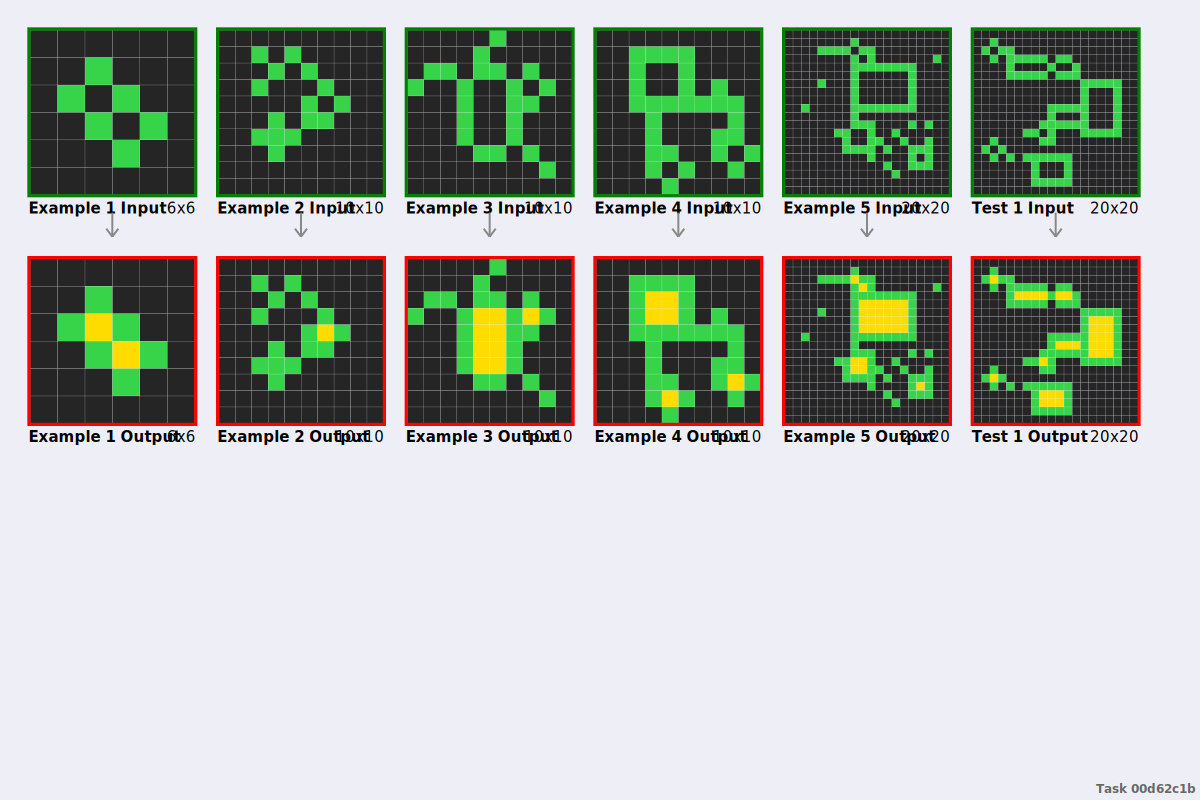

In [17]:
draw_parsed_task_data_svg(
    task_data,
    include_test="all",
    border_colors=("green", "red"),
)